Confusion Matrix:
[[  55   19]
 [  68 1152]]
Accuracy Score: 0.9327666151468316
Precision: 0.9837745516652434
Recall: 0.9442622950819672
F1 Score: 0.9636135508155583
Matthews Correlation Coefficient (MCC): 0.5443033070650222
ROC AUC: 0.8652968542312806


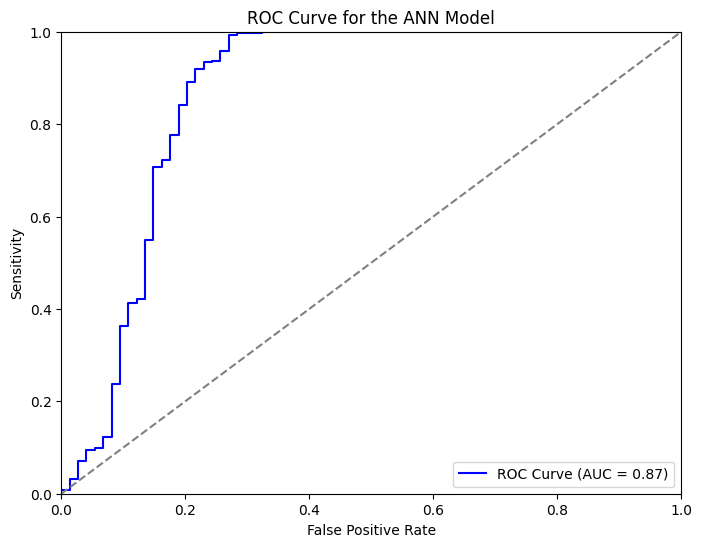

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('df1.csv')

# Drop rows with NA values in the 'Weight' column
data.dropna(subset=['Weight'], inplace=True)

# Separate the features (X) and the target variable (y)
X = data[['age', 'parity', 'gravida', 'numbabies', 'gestation', 'Hemamount', 'Weight', 'Hxob', 'Hxantenatal', 'Deliverymethod', 'Fetalheart', 'year', 'Educlevel']]
y = data['Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a column transformer for one-hot encoding of specific columns
categorical_cols = ['Hxob', 'Hxantenatal', 'Deliverymethod', 'Fetalheart', 'Educlevel']
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Fit and transform the X_train_resampled features using the column transformer
X_train_encoded = ct.fit_transform(X_train_resampled)

# Transform X_test using the fitted column transformer
X_test_encoded = ct.transform(X_test)

# Create and train the Artificial Neural Network (ANN) model
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

ann_classifier.fit(X_train_encoded, y_train_resampled)

# Make predictions on the test set
y_prob = ann_classifier.predict_proba(X_test_encoded)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('Sensitivity')
plt.title('ROC Curve for the ANN Model')
plt.legend(loc='lower right')
plt.show()